In [1]:
setwd('/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/1_Compartment_Analysis/Expt1.8_Hierarchical Clustering/Input')
Output = ('/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/1_Compartment_Analysis/Expt1.8_Hierarchical Clustering/Output')
cur_date = "050621"

library(readxl)
library(janitor)
library(tidyverse)
suppressPackageStartupMessages(library(dendextend))

#reading in file
NLF_data <- data.frame(read_excel("NLF_042321.xlsx"))
NELF_data <- data.frame(read_excel("NELF_042321.xlsx"))
Sputum_data <- data.frame(read_excel("Sputum_042321.xlsx"))
Serum_data <- data.frame(read_excel("Serum_042321.xlsx"))


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


---------------------
Welcome to dendextend version 1.14.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  

In [2]:
head(NLF_data)

,Protein,NS_1,NS_2,NS_3,NS_4,NS_5,NS_6,NS_7,NS_8,NS_9,NS_10,NS_11,NS_12,NS_13,NS_14
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,IFNg,0.2638601,0.00000000,0.1494616,0.8951656,5.8186862,0.3636737,0.8036332,1.4807508,0.01754746,0.4323116,0.24860903,1.8025665,1.7756286,1.5545991
2,IL10,0.1734701,0.24341949,0.1561912,0.1550925,0.3022863,0.1194807,0.1833912,1.1451618,0.06902558,0.1682226,0.08642643,0.3754869,0.3477679,0.5740857
3,IL12p70,0.0000000,0.08310156,0.0000000,0.5869011,1.0878560,0.0000000,0.6653735,0.5077944,0.00000000,0.2376845,0.00000000,0.0000000,0.4038254,0.5678858
4,IL13,2.9429605,1.81383869,1.9203822,1.4663503,2.4367425,0.7083544,2.1002423,3.2091820,1.26760238,2.1378485,1.68505656,3.9701160,3.4602209,3.4998466
5,IL1b,4.3961852,1.66796502,2.7942119,1.8379987,2.2833227,2.7561931,3.3595792,4.6697825,2.55216341,4.4253211,3.09334665,5.2932701,2.4326475,3.4421248
6,IL6,1.2804834,0.73279475,1.0288439,1.3561984,6.0820747,0.9752316,2.0312730,2.2665430,0.92057630,1.5871278,0.21663291,1.8944404,2.3337806,3.9169902


Running hierarchical clustering (HC) on cytokines from non-smokers to compare to k-means. 

In [3]:
#set.seed(7) not sure if I need this
get_hc = function(df){
    df = df %>%
        column_to_rownames(var = "Protein")
    #transposing to scale to normalize data
    t_df = t(df) %>%
        scale() 
    
    #need to transpose back 
    final_df = t(t_df) %>%
        as.data.frame() %>%
        drop_na() #background filter removing nondetect rows
    
    #calculating euclidean dist
    dist_matrix <- dist(final_df, method = 'euclidean')
    
    #getting clusters
    cytokines_hc = hclust(dist_matrix, method = 'average')
    
    return(cytokines_hc)
}

#calling fn
NLF_hc = get_hc(NLF_data)
NELF_hc = get_hc(NELF_data)
Sputum_hc = get_hc(Sputum_data)
Serum_hc = get_hc(Serum_data)

# Dendograms

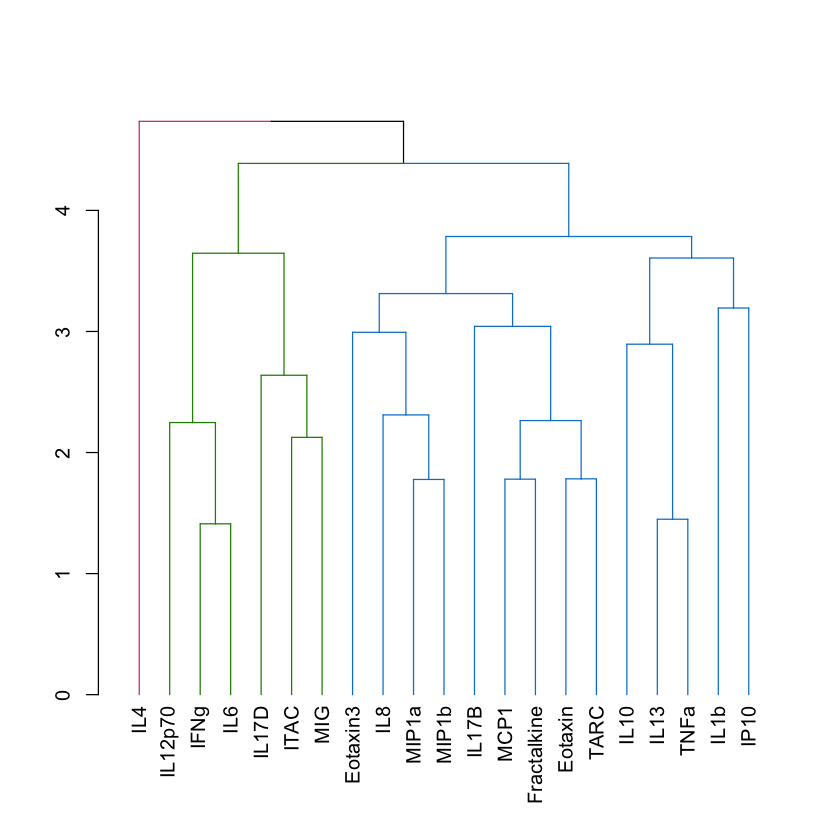

In [12]:
#coloring based upon the number of clusters we want and adding those cluster assignments back into df
#4 clusters puts a single cytokine in at least one cluster for each compartment
plot(color_branches(as.dendrogram(NLF_hc), h = 4))

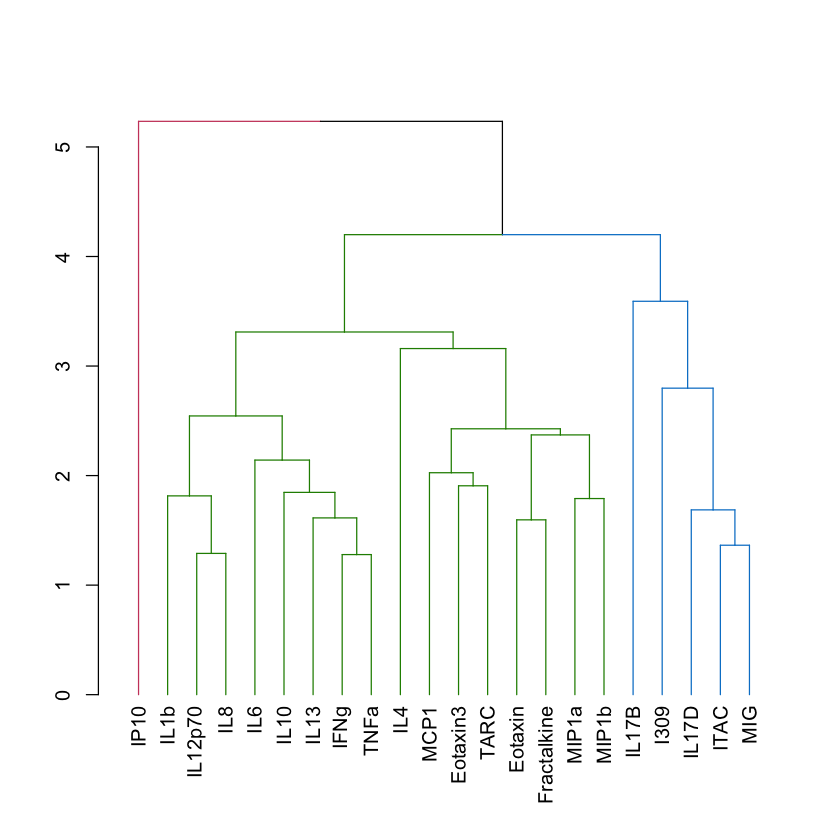

In [6]:
plot(color_branches(as.dendrogram(NELF_hc), h = 4))

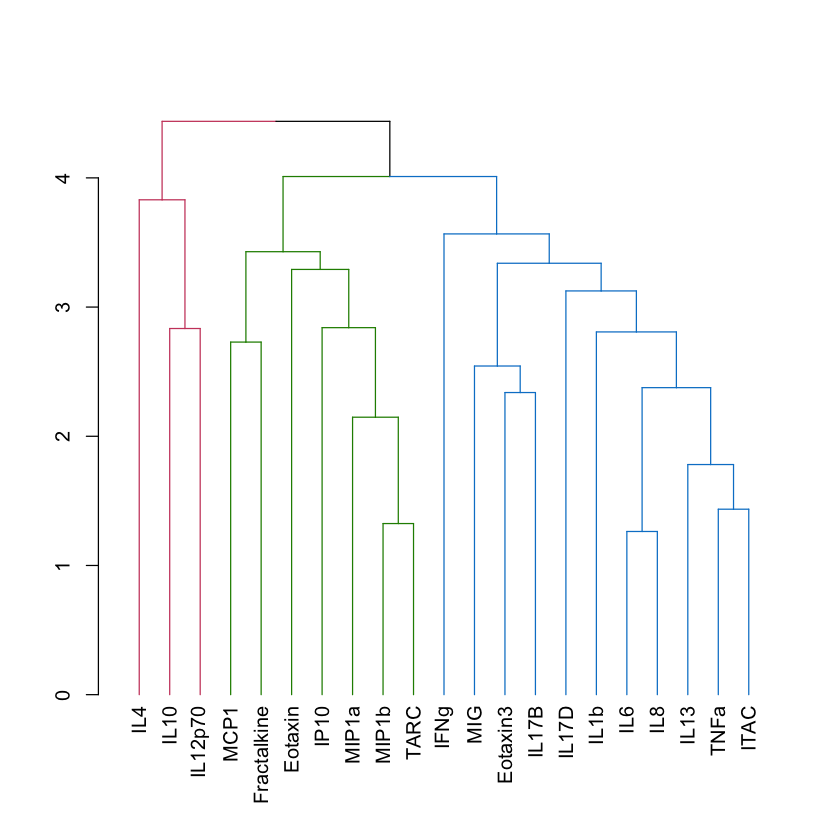

In [7]:
plot(color_branches(as.dendrogram(Sputum_hc), h = 4))

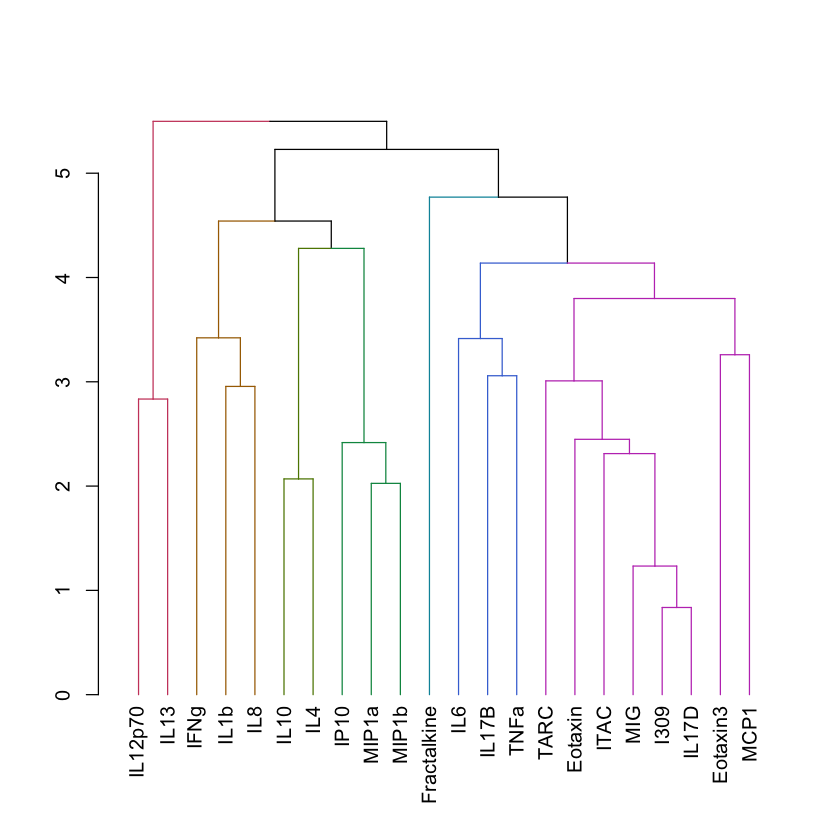

In [8]:
plot(color_branches(as.dendrogram(Serum_hc), h = 4))

In [50]:
get_cluster_assignments = function(initial_df, hclust_df, clus_num){
    #cuts the tree based upon the number of clusters specified by k
    cut_avg <- cutree(hclust_df, k = clus_num)
    clus_df = mutate(initial_df, Cluster = cut_avg)
    return(clus_df)
}

#calling fn
#need to remove I309 from NLF/sputum dfs since they were null
NLF_clus_df = get_cluster_assignments(NLF_data %>%
                                      filter(Protein != 'I309'), NLF_hc, 4) 
NELF_clus_df = get_cluster_assignments(NELF_data, NELF_hc, 4)
Sputum_clus_df = get_cluster_assignments(Sputum_data %>%
                                      filter(Protein != 'I309'), Sputum_hc, 4)
Serum_clus_df = get_cluster_assignments(Serum_data, Serum_hc, 4)

In [64]:
#reassigning outlier cytokines to nearest cluster to condense into 3 clusters
#NLF
NLF_clus_df[NLF_clus_df$Protein == 'IL4',]$Cluster = 1

#NELF: this one required the most rearranging
NELF_clus_df[NELF_clus_df$Protein == 'IP10',]$Cluster = 3 
new_cluster_2 = c("IL4", "MCP1", "Eotaxin3", "TARC", "Eotaxin", "Fractalkine", "MIP1a", "MIP1b")
NELF_clus_df[NELF_clus_df$Protein %in% new_cluster_2,]$Cluster = 2
NELF_clus_df[NELF_clus_df$Protein == 'IL17B',]$Cluster = 3 

#Sputum
Sputum_clus_df[Sputum_clus_df$Protein == 'IL4',]$Cluster = 2

#Serum
Serum_clus_df[Serum_clus_df$Protein == 'Fractalkine',]$Cluster = 1
#select(Serum_clus_df, c('Protein','Cluster')) %>% arrange(-Cluster)

Now getting eigencytokines.

In [66]:
get_eigencytokines = function(comp_df, clus_df){
    compartment_df = t(comp_df %>%
        column_to_rownames(var = "Protein")) %>% 
        data.frame() 

    # the scale function operates across columns 
    compartment_df_scaled <- compartment_df %>% 
      scale() %>% 
      as.data.frame()

    # transpose cytokine data for each compartment
    compartment_df <- as.data.frame(t(compartment_df))

    #renaming first column, grouping and splitting by "Cluster" column
    compartment_df_clus <- clus_df %>% 
        select(Protein, Cluster) %>%
        group_by(Cluster) %>% 
        group_split

    #making dfs for each cluster for PCA analysis 
    compartment_df_1 <- compartment_df_clus[[1]]
    compartment_df_2 <- compartment_df_clus[[2]]
    compartment_df_3 <- compartment_df_clus[[3]]
#    compartment_df_4 <- compartment_df_clus[[4]]

    #making df with subjects' cytokine concentration data for each cluster 
    compartment_df_1 <- compartment_df %>% 
      rownames_to_column("Protein") %>% 
      filter(Protein %in% compartment_df_1$Protein) %>% 
      column_to_rownames(var="Protein")
    compartment_df_2 <- compartment_df %>% 
      rownames_to_column("Protein") %>% 
      filter(Protein %in% compartment_df_2$Protein) %>% 
      column_to_rownames(var="Protein")
    compartment_df_3 <- compartment_df %>% 
      rownames_to_column("Protein") %>% 
      filter(Protein %in% compartment_df_3$Protein) %>% 
      column_to_rownames(var="Protein")
#     compartment_df_4 <- compartment_df %>% 
#       rownames_to_column("Protein") %>% 
#       filter(Protein %in% compartment_df_4$Protein) %>% 
#       column_to_rownames(var="Protein")

     #PCA on each cluster, eigenvectors are in rotation -- PROBLEM - for some reason had to convert everything to numeric  
    pca_compartment_df_1 <- compartment_df_1 %>% 
      prcomp(center = TRUE, scale = TRUE)
    pca_compartment_df_2 <- compartment_df_2 %>% 
      prcomp(center = TRUE, scale = TRUE)
    pca_compartment_df_3 <- compartment_df_3 %>%   
      prcomp(center = TRUE, scale = TRUE)
#    pca_compartment_df_4 <- compartment_df_4 %>%  
#      prcomp() #removed center/scale bc cluster with 1 cytokine can't be centered/scaled

     #eigenvector dfs of first principal component 
    eigencytokines_1 <- data.frame(pca_compartment_df_1$rotation[,"PC1"])
      colnames(eigencytokines_1)[1] <- "Cluster1"
    eigencytokines_2 <- data.frame(pca_compartment_df_2$rotation[,"PC1"])
      colnames(eigencytokines_2)[1] <- "Cluster2"
    eigencytokines_3 <- data.frame(pca_compartment_df_3$rotation[,"PC1"])
      colnames(eigencytokines_3)[1] <- "Cluster3"
#     eigencytokines_4 <- data.frame(pca_compartment_df_4$rotation[,"PC1"])
#       colnames(eigencytokines_4)[1] <- "Cluster4"

   #collapse all eigencytokine dfs
    eigencytokines <- cbind(eigencytokines_1, eigencytokines_2, eigencytokines_3)#, eigencytokines_4)

    return(eigencytokines)
}
NLFget_eigencytokines(NLF_data, NLF_clus_df)

,Cluster1,Cluster2,Cluster3
,<dbl>,<dbl>,<dbl>
NS_1,0.2697534,0.27789862,-0.2747649
NS_2,0.2738414,0.28399657,-0.2611496
NS_3,0.2596293,0.28813050,-0.2689036
NS_4,0.2741568,-0.07695796,-0.2668169
NS_5,0.2220016,-0.12589455,-0.2683740
NS_6,0.2715112,0.28124686,-0.2648532
NS_7,0.2730215,0.28743315,-0.2772183
NS_8,0.2755759,0.28837256,-0.2407440
NS_9,0.2727672,0.28820398,-0.2708059


In [ ]:
#converting subject ids to col, melting, and adding compartment
changed_df = function(df, compartment_name){
    df = reshape2::melt(df %>%
        rownames_to_column(var = "SubjectID"), variable = "Cluster",  value.name = 'Conc_pslog2')
    df$Compartment = rep(compartment_name, times = length(df$SubjectID))
    return(df)
}